#### Задача 1
Даны значения зарплат из выборки выпускников:
$$ 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.$$
Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [56]:
import numpy as np

In [57]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

Считаем среднее арифметическое am и проверяем его

In [58]:
am = salary.sum()/salary.size
print("СА =", am)
am_ = salary.mean()
print("Проверка СА =", am_)

СА = 65.3
Проверка СА = 65.3


Создаем массив квадратов разности - ads

In [59]:
ads = (salary - am)**2
print(ads)

[1.20409e+03 2.16090e+02 9.40900e+01 1.36890e+02 5.61690e+02 1.04329e+03
 4.12090e+02 1.62409e+03 9.00000e-02 2.33289e+03 1.24609e+03 1.70569e+03
 6.88900e+01 1.06090e+02 2.20900e+01 9.40900e+01 9.00000e-02 3.49690e+02
 6.10090e+02 7.17409e+03]


Считаем СКО - msd

In [60]:
msd = (ads.sum()/salary.size)**.5
print(msd)

30.823854398825596


Проверяем СКО - msd_

In [61]:
msd_ = salary.std()
print(msd_)

30.823854398825596


Считаем смещенную оценку дисперсии - bve

In [62]:
bve = ads.sum()/salary.size
print(bve)

950.11


Проверяем смещенную оценку дисперсии - bve_

In [63]:
bve_ = salary.var()
print(bve_)

950.11


Считаем несмещенную оценку дисперсии - unbve

In [64]:
unbve = ads.sum()/(salary.size-1)
print(unbve)

1000.1157894736842


Проверяем несмещенную оценку дисперсии - unbve_

In [65]:
unbve_ = salary.var(ddof=1)
print(unbve_)

1000.1157894736842


#### Задача 2
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Найдем медиану, максимум и минимум в списке salary и рассортируем на 2 списка через медиану.

In [67]:
mediana = np.median(salary)
print("Медиана =", mediana)
max_x = max(salary)
print("Максимальное значение в списке =", max_x)
min_x = min(salary)
print("Минимальное значение в списке =", min_x)

Медиана = 67.5
Максимальное значение в списке = 150
Минимальное значение в списке = 17


In [68]:
x_25 = []
x_75 = []

for x in salary:
    if x < mediana:
        x_25.append(x)
    else:
        x_75.append(x)
        
print(x_25)
print(x_75)

[33, 45, 25, 65, 17, 30, 24, 57, 55, 65]
[100, 80, 75, 77, 89, 70, 75, 84, 90, 150]


Найдем медианы первого и второго списков - это и будут 1 и 3 квартили.

In [69]:
kv_025 = np.median(x_25)
kv_075 = np.median(x_75)
print(kv_025)
print(kv_075)

39.0
82.0


Интерквартильное расстояние будет равно разности третьего и первого квартилей.

In [70]:
interkv_distance = kv_075 - kv_025
print(interkv_distance)

43.0


Построим ящик с усами

<function matplotlib.pyplot.show(close=None, block=None)>

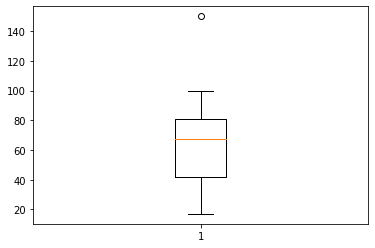

In [71]:
plt.boxplot(salary)
plt.show

В данном примере выбросом является значение 150.

#### Задача 3
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Вероятность того, что случайный студент с факультета A:

In [72]:
qa = 0.25

Вероятность того, что случайный студент с факультета B:

In [73]:
qb = 0.25

Вероятность того, что случайный студент с факультета C:

In [74]:
qc = 0.5

Вероятности сдачи сессии студентами факультетов A, B, C:

In [75]:
pa = 0.8
pb = 0.7
pc = 0.9

Доля сдавших студентов от общего количества поступивших равна:

In [76]:
pt = qa * pa + qb * pb + qc * pc
print(pt)

0.825


Вероятность, что a с факультета A:

In [77]:
p = qa * pa / pt
print(p)

0.24242424242424246


Вероятность, что b с факультета B:

In [78]:
p = qb * pb / pt
print(p)

0.21212121212121213


Вероятность, что c с факультета C:

In [79]:
p = qc * pc / pt
print(p)

0.5454545454545455
